In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsdisagg import disaggregate_series
import statsmodels.api as sm

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 768 entries, 1950-01-01 to 2023-07-01
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bonds       147 non-null    float64
 1   Y           115 non-null    float64
 2   C           115 non-null    float64
 3   Kformation  115 non-null    float64
 4   stock       70 non-null     float64
 5   r           755 non-null    float64
 6   Exports     115 non-null    float64
 7   Imports     115 non-null    float64
dtypes: float64(8)
memory usage: 54.0 KB


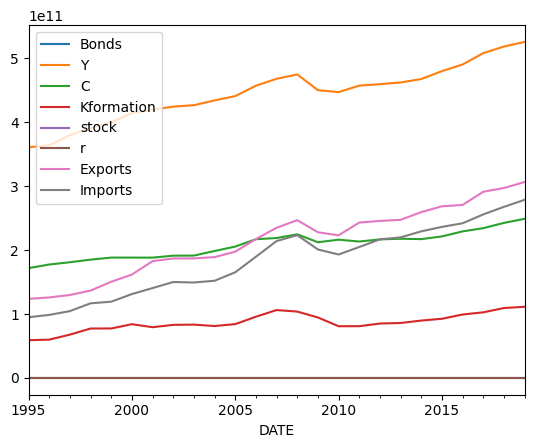

In [2]:
from pandas_datareader.fred import FredReader
fred_indicators = ['IRLTLT01DKQ156N', 'NAEXKP01DKQ189S', 'NAEXKP02DKQ189S', 'NAEXKP04DKQ189S', 'RKNANPDKA666NRUG', 'DNKLOCOSTORSTM', 'NAEXKP06DKQ652S', 'NAEXKP07DKQ652S']

df = FredReader(symbols=fred_indicators, start='1900-01-01', end=None, freq ='Q').read()

df.rename(columns={
    'IRLTLT01DKQ156N': 'Bonds', #monthly 
    'NAEXKP01DKQ189S': 'Y',
    'NAEXKP02DKQ189S': 'C',
    'NAEXKP04DKQ189S': 'Kformation',
    'RKNANPDKA666NRUG': 'stock', #annual
    'DNKLOCOSTORSTM': 'r', #monthly 
    'NAEXKP06DKQ652S': 'Exports',
    'NAEXKP07DKQ652S': 'Imports'
}, inplace=True)
df.to_csv('custom_df.csv')
df
df.dropna().plot()
df.info()

In [3]:
stock = df['stock']
#setting it up in years so it stops giving me missing values error since im going from low to higher frequency with stocks 
stock = df['stock'].resample('YS').sum().dropna()
stock_quarterly = disaggregate_series(stock, target_freq='QS', agg_func='sum')
r = df['r']
def compound_interest(monthly_interests):
    quarterly_interest = (1 + monthly_interests).prod() - 1
    return quarterly_interest
r_decimal = r.mul(1 / 100)
r_quarterly = r_decimal.resample('QS').agg(compound_interest)
r_quarterly = r_quarterly + 1
r_quarterly
Br = df['Bonds']
def compound_interest(monthly_interests):
    quarterly_interest = (1 + monthly_interests).prod() - 1
    return quarterly_interest
Br_decimal = Br.mul(1 / 100)
Br_quarterly = Br_decimal.resample('QS').agg(compound_interest)
Br_quarterly = Br_quarterly + 1
Br_quarterly

DATE
1950-01-01    1.000000
1950-04-01    1.000000
1950-07-01    1.000000
1950-10-01    1.000000
1951-01-01    1.000000
                ...   
2022-07-01    1.017203
2022-10-01    1.024207
2023-01-01    1.025097
2023-04-01    1.025690
2023-07-01    1.027630
Freq: QS-JAN, Name: Bonds, Length: 295, dtype: float64

In [4]:
df1 = pd.read_csv('https://stats.oecd.org/SDMX-JSON/data/ANHRS/DNK.DE+TE.A/OECD?contentType=csv')
df1.to_csv('df1.csv')
df1 = df1[df1['Employment status'] == 'Total employment']
hours = df1.loc[:,['Time','Value']]
hours = hours.rename(columns= {'Value': 'N'})
hours['Time'] = pd.to_datetime(hours['Time'], format='%Y')
hours.set_index('Time', inplace=True)
quarterly_N = disaggregate_series(hours, target_freq='QS', agg_func='sum')
quarterly_N

1970-01-01    462.788670
1970-04-01    462.208044
1970-07-01    461.046792
1970-10-01    459.304914
1971-01-01    456.982409
                 ...    
2021-10-01    342.374966
2022-01-01    342.655797
2022-04-01    342.866420
2022-07-01    343.006836
2022-10-01    343.077043
Freq: QS-OCT, Name: N, Length: 212, dtype: float64

In [5]:
df2 = pd.read_csv('https://stats.oecd.org/SDMX-JSON/data/EAR_MEI/LCEAMN01_IXOB+LCEAMN01_IXOBSA+LCEAPR_IXOBSA.DNK.Q/OECD?contentType=csv', parse_dates=['Time'], infer_datetime_format=True)
df2.to_csv('df2.csv')
df2 = df2[df2['Subject'] == 'Manufacturing, Index']
wages = df2.loc[:,['Time','Value']]
wages = wages.rename(columns= {'Value': 'w'})
wages['Time'] = wages['Time'].apply(lambda x: x[3:] + "-" + "Q" + x[1])
wages['Time'] = pd.to_datetime(wages['Time'])
wages.set_index('Time', inplace=True)
wages.head()

C:\Users\Gaya\AppData\Local\Temp\ipykernel_9280\2957788866.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2 = pd.read_csv('https://stats.oecd.org/SDMX-JSON/data/EAR_MEI/LCEAMN01_IXOB+LCEAMN01_IXOBSA+LCEAPR_IXOBSA.DNK.Q/OECD?contentType=csv', parse_dates=['Time'], infer_datetime_format=True)
C:\Users\Gaya\AppData\Local\Temp\ipykernel_9280\2957788866.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2 = pd.read_csv('https://stats.oecd.org/SDMX-JSON/data/EAR_MEI/LCEAMN01_IXOB+LCEAMN01_IXOBSA+LCEAPR_IXOBSA.DNK.Q/OECD?contentType=csv', parse_dates=['Time'], infer_datetime_format=True)
C:\Users\Gaya\AppData\Local\Temp\ipykerne

,w
Time,
1971-01-01,6.801153
1971-04-01,7.283459
1971-07-01,7.472557
1971-10-01,7.702024
1972-01-01,7.810383


In [6]:
df_quarterly = pd.DataFrame()

In [7]:
df_quarterly['Br_quarterly'] = Br_quarterly
df_quarterly['r_quarterly'] = r_quarterly
df_quarterly['stock_quarterly'] = stock_quarterly
C = df['C']
df_quarterly['C_quarterly'] = C
Y = df['Y']
df_quarterly['Y_quarterly'] = Y
K = df['Kformation']
df_quarterly['K_quarterly'] = K
EX = df['Exports']
df_quarterly['EX_quarterly'] = EX
IM = df['Imports']
df_quarterly['IM_quarterly'] = IM
df_quarterly

,Br_quarterly,r_quarterly,stock_quarterly,C_quarterly,Y_quarterly,K_quarterly,EX_quarterly,IM_quarterly
DATE,,,,,,,,
1950-01-01,1.000000,1.000000,50739.900238,NaN,NaN,NaN,NaN,NaN
1950-04-01,1.000000,1.000000,50793.726080,NaN,NaN,NaN,NaN,NaN
1950-07-01,1.000000,1.000000,50901.377765,NaN,NaN,NaN,NaN,NaN
1950-10-01,1.000000,1.000000,51062.855292,NaN,NaN,NaN,NaN,NaN
1951-01-01,1.000000,1.000000,51278.158662,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-07-01,1.017203,1.006500,-3022.186096,2.535687e+11,5.704050e+11,1.220930e+11,3.617697e+11,3.143486e+11
2022-10-01,1.024207,1.025156,-3715.802576,2.528550e+11,5.719180e+11,1.385479e+11,3.607410e+11,3.201785e+11
2023-01-01,1.025097,1.000000,-1734.041202,2.534612e+11,5.779868e+11,1.187667e+11,3.741787e+11,3.156046e+11


In [8]:
merged = pd.concat([df_quarterly, quarterly_N, wages], axis=1)
merged

,Br_quarterly,r_quarterly,stock_quarterly,C_quarterly,Y_quarterly,K_quarterly,EX_quarterly,IM_quarterly,N,w
1950-01-01,1.000000,1.000000,50739.900238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-04-01,1.000000,1.000000,50793.726080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-07-01,1.000000,1.000000,50901.377765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-10-01,1.000000,1.000000,51062.855292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-01,1.000000,1.000000,51278.158662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,1.017203,1.006500,-3022.186096,2.535687e+11,5.704050e+11,1.220930e+11,3.617697e+11,3.143486e+11,343.006836,117.9301
2022-10-01,1.024207,1.025156,-3715.802576,2.528550e+11,5.719180e+11,1.385479e+11,3.607410e+11,3.201785e+11,343.077043,118.1592
2023-01-01,1.025097,1.000000,-1734.041202,2.534612e+11,5.779868e+11,1.187667e+11,3.741787e+11,3.156046e+11,NaN,118.8467
2023-04-01,1.025690,1.000000,-247.720172,2.553740e+11,5.726660e+11,1.202073e+11,3.860724e+11,3.310575e+11,NaN,122.2074


Br_quarterly


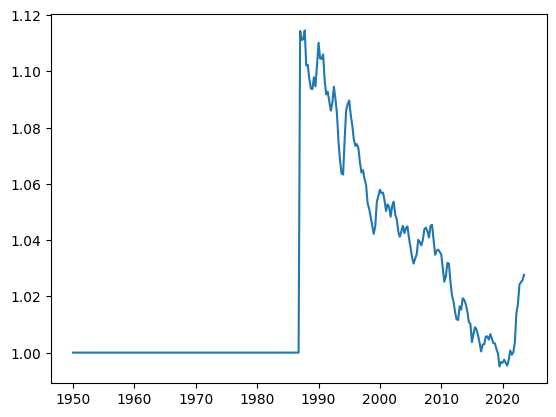

r_quarterly


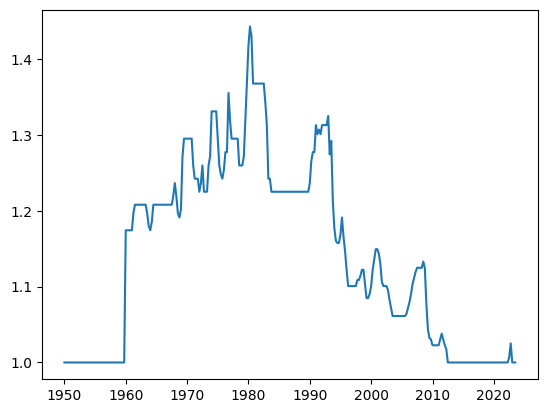

stock_quarterly


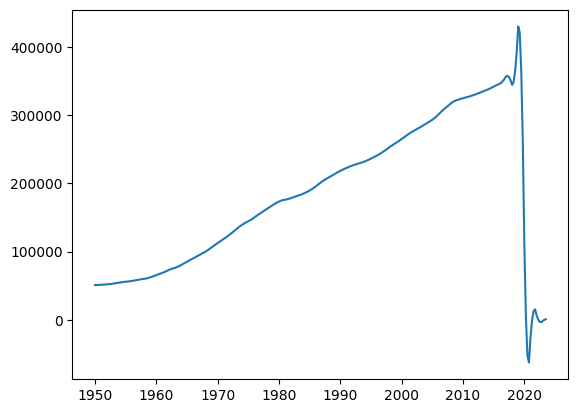

C_quarterly


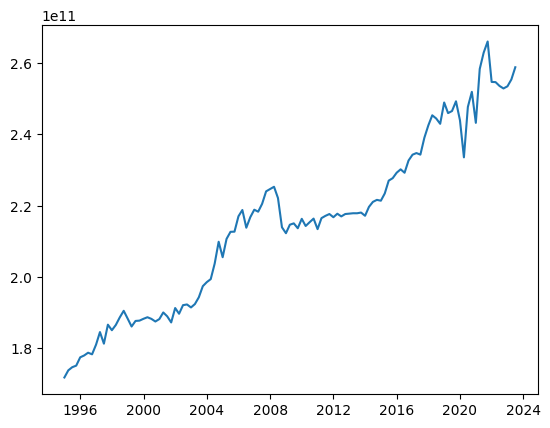

Y_quarterly


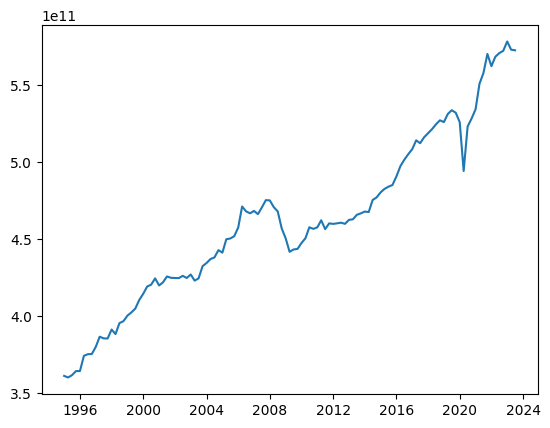

K_quarterly


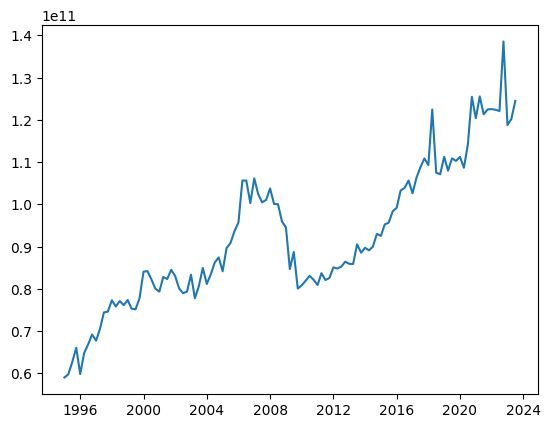

EX_quarterly


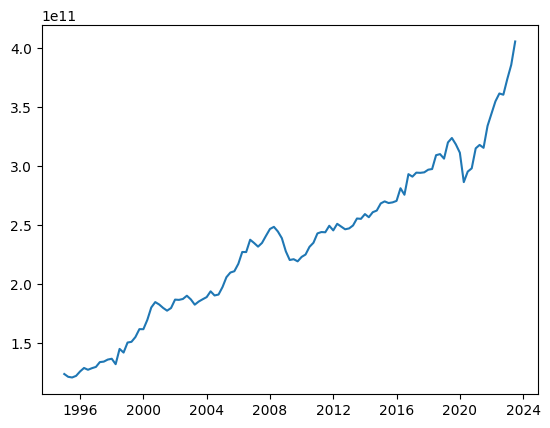

IM_quarterly


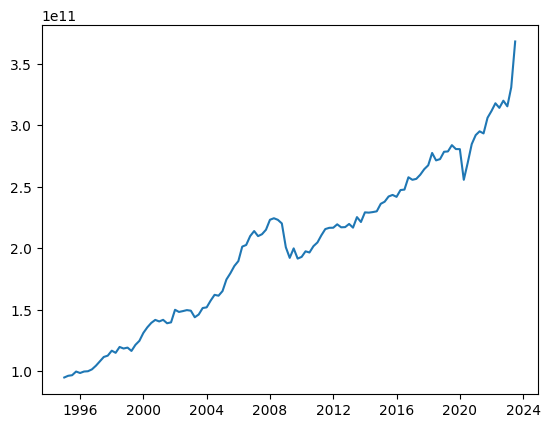

N


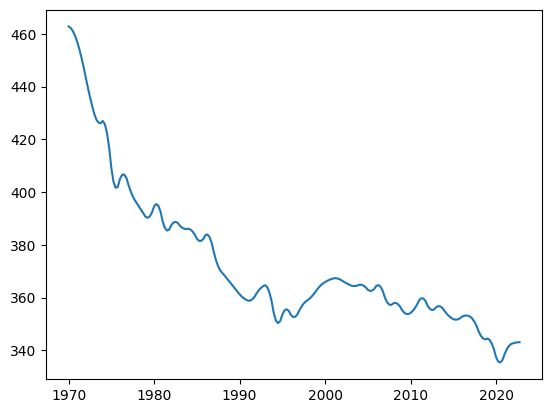

w


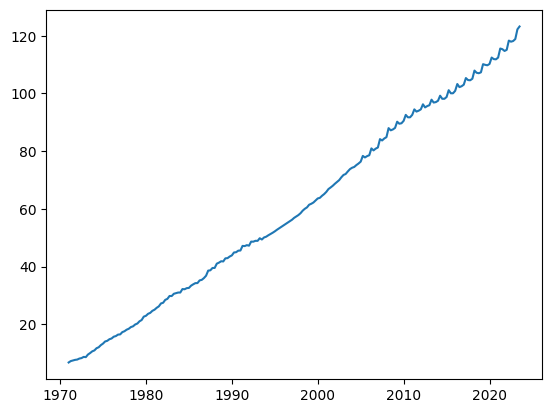

In [9]:
for columns in merged.columns:
    print(columns)
    column_data = merged[columns].dropna()
    plt.plot(column_data, label=columns)
    plt.show()

In [10]:
#Let's start with removing seasonality 
#Let's look at the list again and at what is not seasonally adjusted 
#'IRLTLT01DKQ156N': 'Bonds', #monthly --> not seasonally adjusted 
#NAEXKP01DKQ189S: Y,--> done
#'NAEXKP02DKQ189S': 'C',--> done 
#'NAEXKP04DKQ189S': 'Kformation',--> done 
#'RKNANPDKA666NRUG': 'stock', #annual, --> turned into stock_quarterly and not seasonally adjusted 
#'DNKLOCOSTORSTM': 'r', #monthly, turned into r_quarterly --> not seasonally adjusted 
#'NAEXKP06DKQ652S': 'Exports', --> done 
#'NAEXKP07DKQ652S': 'Imports'--> done 
#+ OECD variables are seasonally adjusted are per their description on the website 

<Axes: ylabel='Resid'>

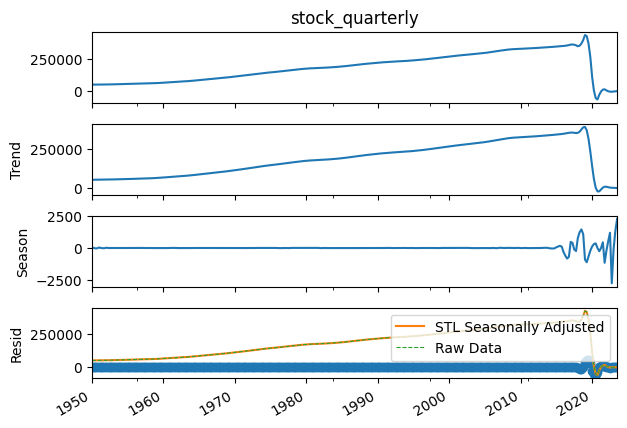

In [11]:
#Let's start with stock, aka investment 
stl_res= sm.tsa.STL(merged.stock_quarterly.dropna(), period=4).fit()
stl_res.plot()
#actual detrending 
(merged.stock_quarterly.dropna() - stl_res.seasonal).plot(label = 'STL Seasonally Adjusted', legend=True)
merged.stock_quarterly.dropna().plot(ls='--', lw=0.8, label='Raw Data', legend=True)

<Axes: ylabel='Resid'>

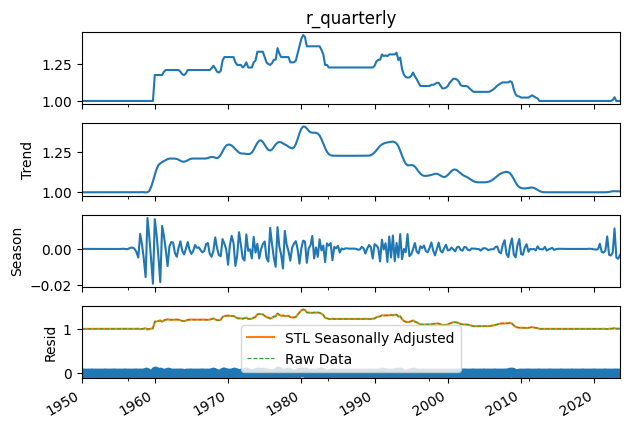

In [12]:
#now for r
stl_res= sm.tsa.STL(merged.r_quarterly.dropna(), period=4).fit()
stl_res.plot()
#actual detrending 
(merged.r_quarterly.dropna() - stl_res.seasonal).plot(label = 'STL Seasonally Adjusted', legend=True)
merged.r_quarterly.dropna().plot(ls='--', lw=0.8, label='Raw Data', legend=True)

<Axes: ylabel='Resid'>

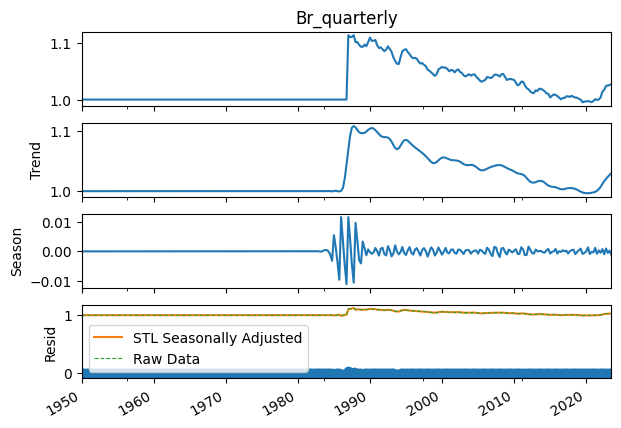

In [13]:
#finally, for bonds 
stl_res= sm.tsa.STL(merged.Br_quarterly.dropna(), period=4).fit()
stl_res.plot()
#actual detrending 
(merged.Br_quarterly.dropna() - stl_res.seasonal).plot(label = 'STL Seasonally Adjusted', legend=True)
merged.Br_quarterly.dropna().plot(ls='--', lw=0.8, label='Raw Data', legend=True)

In [14]:
#seasonal adjustment is done 
#moving on to de-trending 
#Let's start with everything but the rates 

<Axes: >

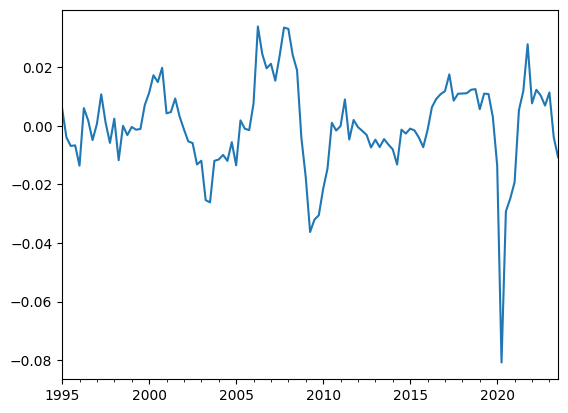

In [15]:
#starting with Y 
LogY = np.log(merged['Y_quarterly'].dropna())
cycle, trend = sm.tsa.hp_filter.hpfilter(LogY)
LogY = cycle
LogY.plot()

<Axes: >

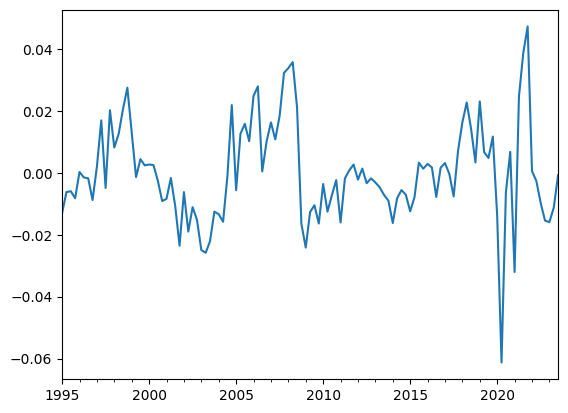

In [16]:
#now C  
LogC = np.log(merged['C_quarterly'].dropna())
cycle, trend = sm.tsa.hp_filter.hpfilter(LogC)
LogC = cycle
LogC.plot()

<Axes: >

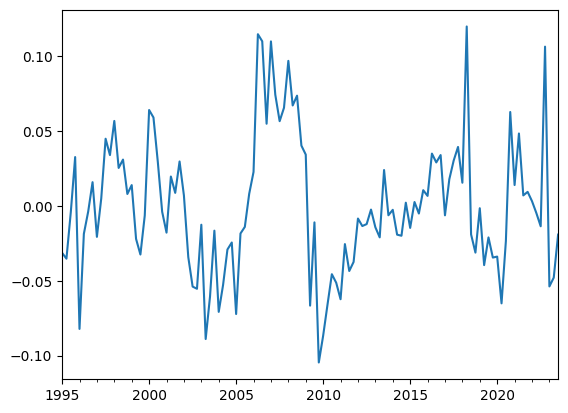

In [17]:
#now K
LogK = np.log(merged['K_quarterly'].dropna())
cycle, trend = sm.tsa.hp_filter.hpfilter(LogK)
LogK = cycle
LogK.plot()

<Axes: >

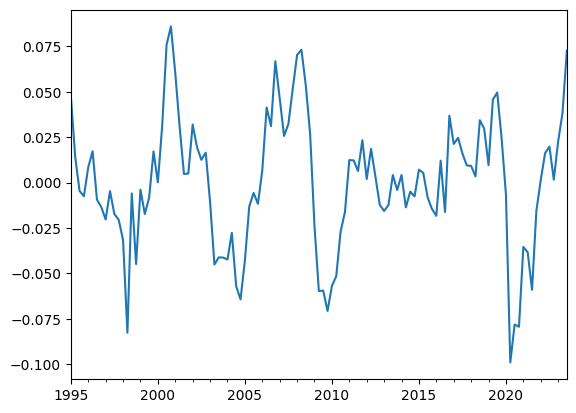

In [18]:
#now EXports  
LogEX = np.log(merged['EX_quarterly'].dropna())
cycle, trend = sm.tsa.hp_filter.hpfilter(LogEX)
LogEX = cycle
LogEX.plot()

<Axes: >

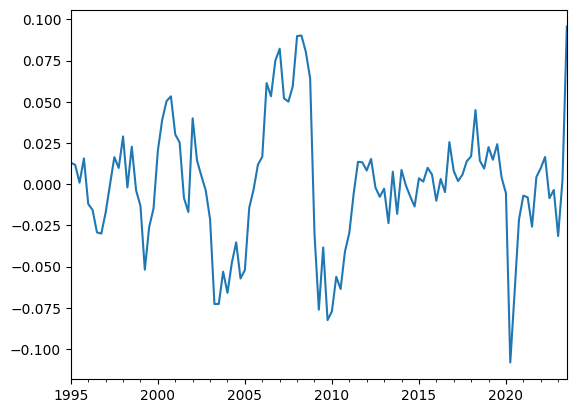

In [19]:
#now IM
LogIM = np.log(merged['IM_quarterly'].dropna())
cycle, trend = sm.tsa.hp_filter.hpfilter(LogIM)
LogIM = cycle
LogIM.plot()

In [20]:
#still need to de trend bonds stocks and interest rates 